## Ejercicio 1

Julián Cámara Miró

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(result: dict, width=5) -> None:
    
    counts = sorted(result.items(), key=lambda x: x[0])
    
    keys = [str(list(x[0]))[1:-1] for x in counts]
    values = [x[1] for x in counts]

    plt.figure(figsize=(width, 5))
    plt.bar_label(plt.bar(keys, [x / 1000 for x in values]), values)

Primero creamos el circuito.

Aplicamos una puerta hadamard al único qubit del circuito para ponerlo en superposición. Una vez hecho esto, volcamos el qubit sobre un bit clásico para medirlo.

In [96]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(1, 1)
circ.H(0)
circ.measure_all()

render_circuit_jupyter(circ)

Lo bueno de este entorno es que podemos usar los circuitos que diseñamos en varios backends sin tener que hacer demasiados cambios.

Por ejemplo, probamos primero a ejecutar en el simulador de qiskit.

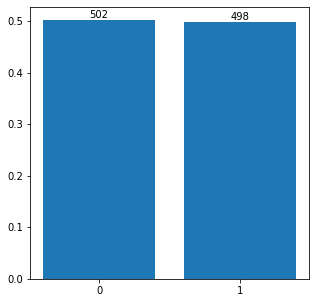

In [99]:
from pytket.extensions.qiskit import AerBackend

backend = AerBackend()
backend.get_compiled_circuit(circ)
counts = backend.run_circuit(circ, n_shots=1000).get_counts()

plot_histogram(counts)

Y ahora con cirq.

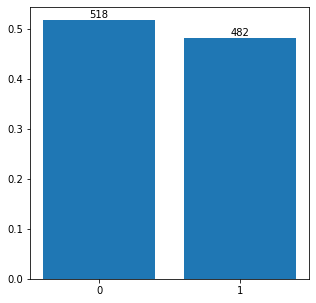

In [104]:
from pytket.extensions.cirq import CirqCliffordSampleBackend

backend = CirqCliffordSampleBackend()
backend.get_compiled_circuit(circ)
counts = backend.run_circuit(circ, n_shots=1000).get_counts()

plot_histogram(counts)

Como hemos visto, hemos ejecutado el mismo circuito en dos backends distinitos, sin necesidad de cambiar nada.